In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline

In [2]:
import os
os.chdir(".\\")

In [3]:
hd=pd.read_csv('heart.csv')
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd.shape

(303, 14)

In [5]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Descriptions of the columns in the dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value which we will train the models to find.

In [8]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564

In [9]:
hd.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [10]:
#Rename the columns
hd.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [11]:
hd.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [12]:
hd.shape

(303, 14)

In [13]:
hd.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD27A2F588>,
      dtype=object)

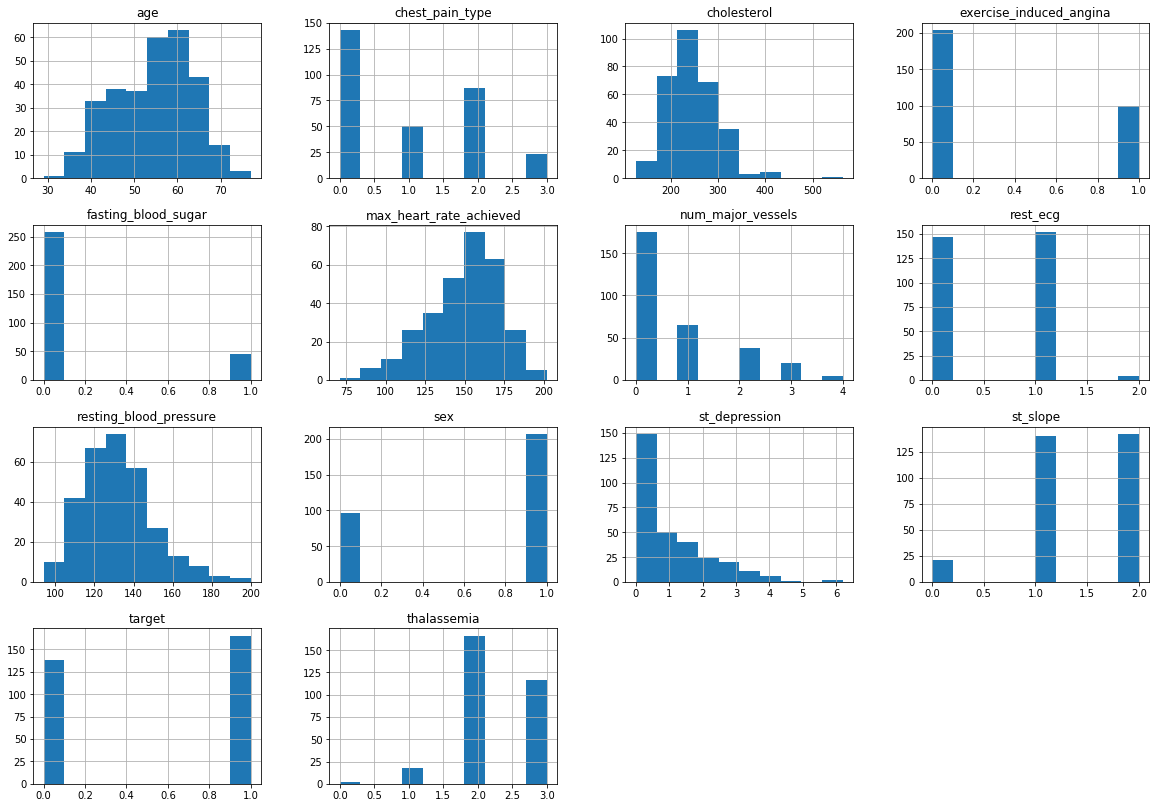

In [14]:
import matplotlib.pyplot as plt #For visualization
from matplotlib import rcParams #add styling to the plots
from matplotlib.cm import rainbow #for colors
import seaborn as sns
rcParams['figure.figsize'] = 20, 14

hd.hist()

Each feature has a different range of distribution. Scaling before our predictions should be helpful.

Text(0.5, 1.0, 'Count of each Target Class')

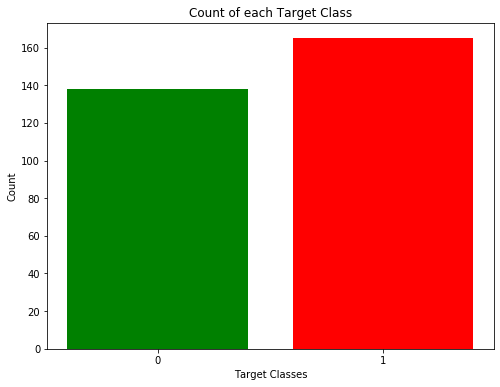

In [15]:
# Check for the target classes to evaluate if they are of approximately same size

rcParams['figure.figsize'] = 8,6
plt.bar(hd['target'].unique(), hd['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

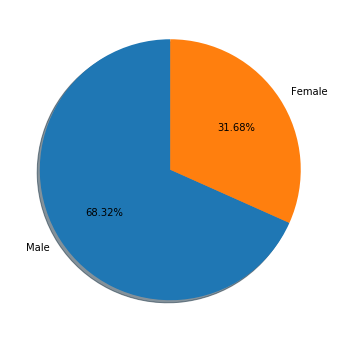

In [16]:
# Male vs Female data
male = len(hd[hd.sex == 1])
female = len(hd[hd.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

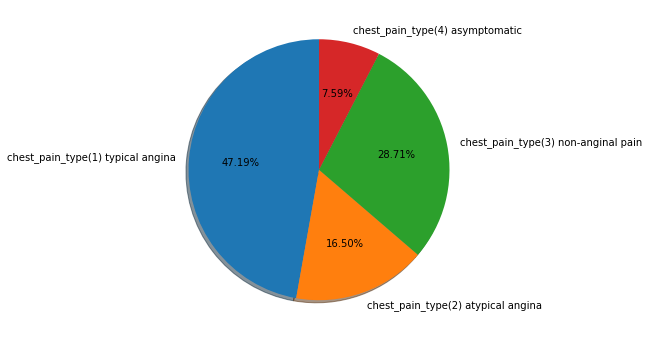

In [17]:
# Chest Pain Type
x = [len(hd[hd['chest_pain_type'] == 0]),len(hd[hd['chest_pain_type'] == 1]), len(hd[hd['chest_pain_type'] == 2]), len(hd[hd['chest_pain_type'] == 3])]
plt.pie(x, data=hd, labels=['chest_pain_type(1) typical angina', 'chest_pain_type(2) atypical angina', 'chest_pain_type(3) non-anginal pain', 'chest_pain_type(4) asymptomatic'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

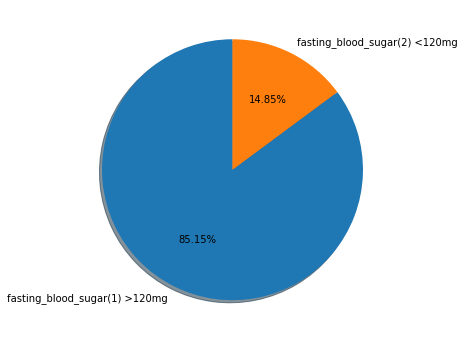

In [18]:
# Fasting Blood Sugar

x = [len(hd[hd['fasting_blood_sugar'] == 0]),len(hd[hd['fasting_blood_sugar'] == 1])]
plt.pie(x, data=hd, labels=['fasting_blood_sugar(1) >120mg', 'fasting_blood_sugar(2) <120mg',], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

Text(0.5, 1.0, 'Ca values in data')

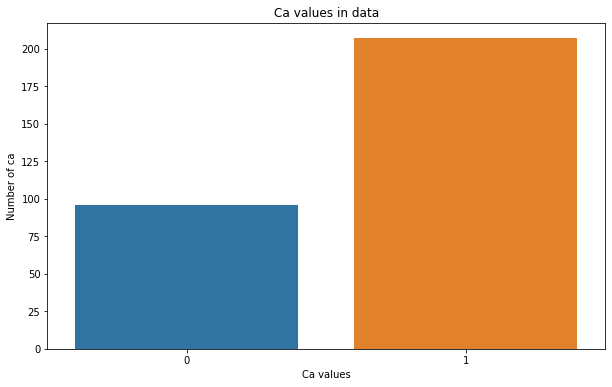

In [19]:
plt.figure(figsize=(10,6))
count= hd.sex.value_counts()
sns.barplot(x=count.index, y=count.values)
plt.ylabel("Number of ca")
plt.xlabel("Ca values")
plt.title("Ca values in data", color="black", fontsize="12")

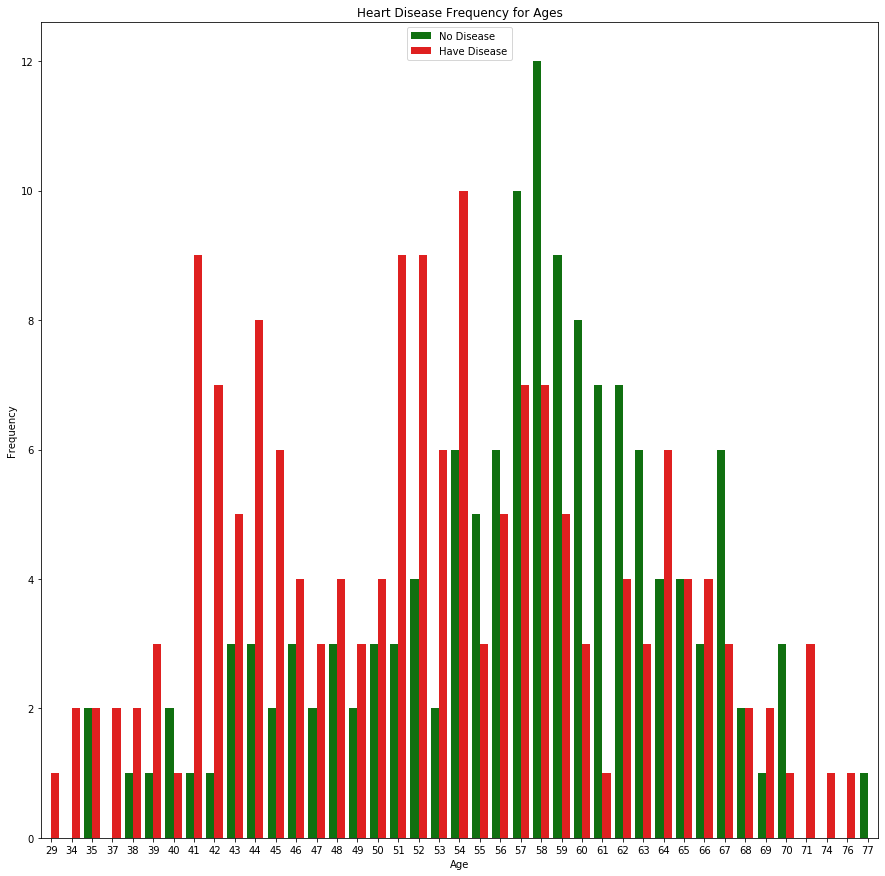

In [20]:
# Heart disease frequency by age
plt.figure(figsize=(15, 15))
sns.countplot(x='age', hue='target', data=hd, palette=['green', 'red'])
plt.legend(["No Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

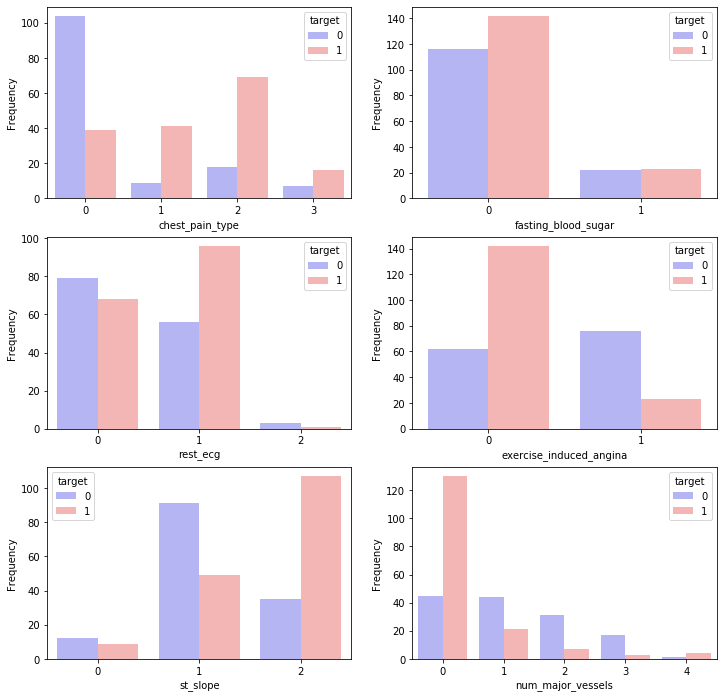

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
hd1 = ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg','exercise_induced_angina', 'st_slope', 'num_major_vessels']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=hd1[i], hue='target', data=hd, palette='bwr', ax=axi) 
    axi.set(ylabel='Frequency')

In [22]:
y=hd.target.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
hd.drop(["target"],inplace=True,axis=1)

In [24]:
x=hd.values

In [25]:
x

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [26]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(x)

x=scaler.transform(x)
print(x)


[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.25,random_state=0)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DT=DecisionTreeClassifier()

In [30]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
DT.score(x_test,y_test)

0.7894736842105263

In [32]:
DT.score(x_train,y_train)

1.0

In [33]:
DT.score(x,y)

0.9471947194719472

In [34]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=10)


score=cross_val_score(DT,x,y,cv=kfold)
score

array([0.64516129, 0.90322581, 0.83870968, 0.63333333, 0.66666667,
       0.83333333, 0.76666667, 0.73333333, 0.53333333, 0.5       ])

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
KNN=KNeighborsClassifier()

In [37]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
KNN.score(x_test,y_test)

0.8421052631578947

In [39]:
KNN.score(x_train,y_train)

0.8590308370044053

In [40]:
KNN.score(x,y)

0.8547854785478548

In [41]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=10)


score=cross_val_score(KNN,x,y,cv=kfold)
score

array([0.87096774, 0.83870968, 0.83870968, 0.8       , 0.8       ,
       0.76666667, 0.66666667, 0.9       , 0.76666667, 0.53333333])

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
GN=GaussianNB()

In [44]:
GN.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
GN.score(x_test,y_test)

0.8289473684210527

In [46]:
GN.score(x_train,y_train)

0.8546255506607929

In [47]:
GN.score(x,y)

0.8481848184818482

In [48]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=10)


score=cross_val_score(GN,x,y,cv=kfold)
score

array([0.80645161, 0.90322581, 0.87096774, 0.83333333, 0.86666667,
       0.76666667, 0.76666667, 0.86666667, 0.8       , 0.56666667])

In [49]:
score.mean()

0.8047311827956989

In [50]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)

In [51]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
RF.score(x_train,y_train)

1.0

In [53]:
RF.score(x_test,y_test)

0.8552631578947368

In [54]:
RF.score(x,y)

0.9636963696369637

In [55]:
from sklearn.model_selection import cross_val_score,KFold

kfold=KFold(n_splits=10)


score=cross_val_score(RF,x,y,cv=kfold)
score

array([0.80645161, 0.83870968, 0.80645161, 0.73333333, 0.86666667,
       0.83333333, 0.83333333, 0.9       , 0.66666667, 0.63333333])

In [56]:
y_pred = RF.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [57]:
y_test#actual values

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=RF.classes_,columns=RF.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        0   1
Predicted        
0          25   3
1           8  40


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



ROC AUC: 0.84


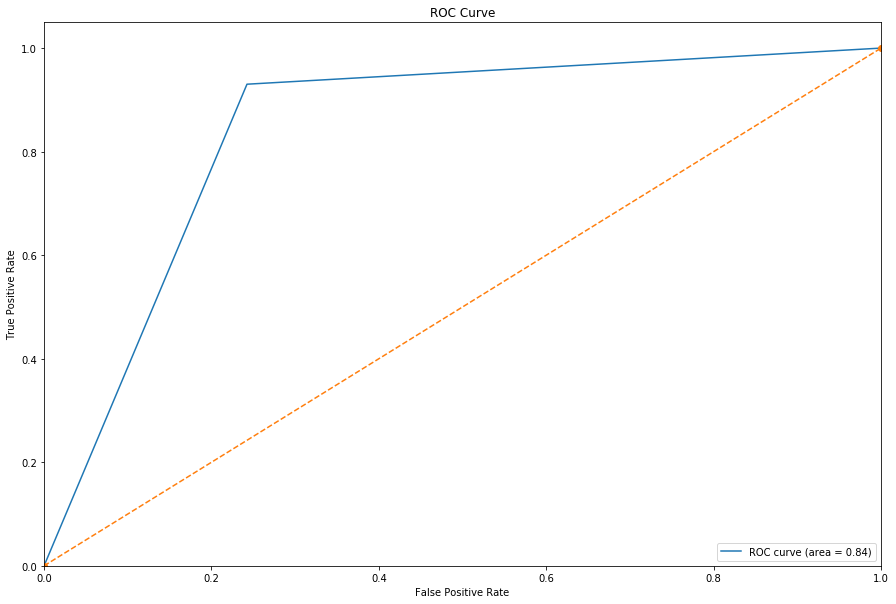

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
x=[[41,0,1,130,204,0,0,172,0,1.4,2,0,2]]
x=scaler.transform(x)
RF.predict(x)


array([1], dtype=int64)